### End 2 End NLP Project
+ Emotion Detection In Text
+ Text Classifier

In [1]:
# Load EDA Pkgs 
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)  # Increase the max_iter value
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
# Load Dataset
df = pd.read_csv("data/emotion_dataset_2.csv")

In [6]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
df.columns = ['A','Emotion','Text','B']
df.head()

,A,Emotion,Text,B
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [8]:
df2 = df.drop(['A','B'], axis = 'columns')
df2.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
df2.to_csv('data_raw.csv', index=False)

In [10]:
df = pd.read_csv("data/data_raw.csv")

In [11]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [12]:
# Value Counts 
df["Emotion"].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<AxesSubplot: xlabel='Emotion', ylabel='count'>

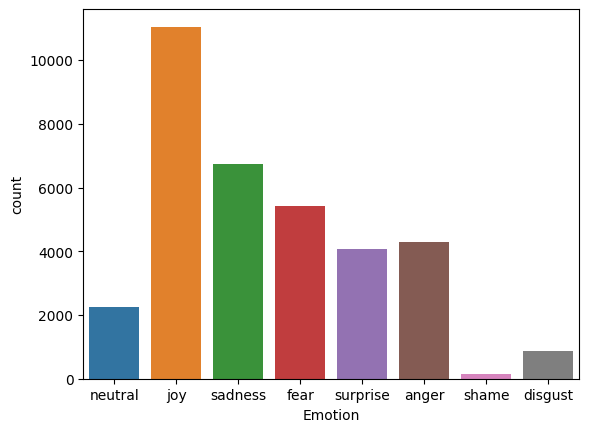

In [13]:
# Plot 
sns.countplot(x = "Emotion", data = df)

In [14]:
# Data Cleaning 
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [15]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [16]:
# Stop words
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [17]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [18]:
# Features $ Labels 
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [19]:
# Split Data 
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels, test_size = 0.3, random_state = 42)

In [20]:
# Build Pipeline 
from sklearn.pipeline import Pipeline

In [21]:
# LogisticRegression Pipeline
logreg = LogisticRegression(max_iter=1000)
pipe_lr = Pipeline(steps = [('cv',CountVectorizer()),('lr',logreg)])

In [22]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(max_iter=1000))])

In [23]:
# Check Accurary
pipe_lr.score(x_test,y_test)

0.6209043878137575

In [24]:
# Make a prediction
exl = "This book was so interesting it made me happy"

In [25]:
pipe_lr.predict([exl])

array(['joy'], dtype=object)

In [26]:
# Prediction Prob
pipe_lr.predict_proba([exl])

array([[1.64483701e-03, 7.04046402e-03, 6.98327125e-03, 9.43286754e-01,
        1.03251293e-04, 2.63058577e-02, 6.82103175e-05, 1.45673541e-02]])

In [27]:
# To Know the classes 
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [28]:
# Save Model 
import joblib
pipeline_file = open("emotion_classifier_pipe.pkl", "wb") 
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()

In [29]:
# Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [30]:
rf_model = RandomForestClassifier()
svm_model = SVC()
xgb_model = XGBClassifier()


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train_vectorized, y_train_encoded)

# Calculate metrics for Logistic Regression
lr_accuracy = lr_model.score(x_test_vectorized, y_test_encoded)
lr_predictions = lr_model.predict(x_test_vectorized)
lr_f1_score = f1_score(y_test_encoded, lr_predictions, average='weighted')
lr_precision = precision_score(y_test_encoded, lr_predictions, average='weighted')
lr_recall = recall_score(y_test_encoded, lr_predictions, average='weighted')
# Convert string labels to numeric class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Vectorize text data
vectorizer = TfidfVectorizer()
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Train Random Forest
rf_model.fit(x_train_vectorized, y_train_encoded)
rf_accuracy = rf_model.score(x_test_vectorized, y_test_encoded)
rf_predictions = rf_model.predict(x_test_vectorized)
rf_f1_score = f1_score(y_test_encoded, rf_predictions, average='weighted')
rf_precision = precision_score(y_test_encoded, rf_predictions, average='weighted')
rf_recall = recall_score(y_test_encoded, rf_predictions, average='weighted')

# Train SVM
svm_model.fit(x_train_vectorized, y_train_encoded)
svm_accuracy = svm_model.score(x_test_vectorized, y_test_encoded)
svm_predictions = svm_model.predict(x_test_vectorized)
svm_f1_score = f1_score(y_test_encoded, svm_predictions, average='weighted')
svm_precision = precision_score(y_test_encoded, svm_predictions, average='weighted')
svm_recall = recall_score(y_test_encoded, svm_predictions, average='weighted')

# Train XGBoost
xgb_model.fit(x_train_vectorized, y_train_encoded)
xgb_accuracy = xgb_model.score(x_test_vectorized, y_test_encoded)
xgb_predictions = xgb_model.predict(x_test_vectorized)
xgb_f1_score = f1_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_precision = precision_score(y_test_encoded, xgb_predictions, average='weighted')
xgb_recall = recall_score(y_test_encoded, xgb_predictions, average='weighted')


In [50]:

results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
results.loc[0] = ['Logistic Regression', lr_accuracy, lr_f1_score, lr_precision, lr_recall]
results.loc[1] = ['Random Forest', rf_accuracy, rf_f1_score, rf_precision, rf_recall]
results.loc[2] = ['SVM', svm_accuracy, svm_f1_score, svm_precision, svm_recall]
results.loc[3] = ['XGBoost', xgb_accuracy, xgb_f1_score, xgb_precision, xgb_recall]


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary for the results
results_dict = {
    'Model': ['Random Forest', 'SVM', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, svm_accuracy, xgb_accuracy, lr_accuracy],
    'F1 Score': [rf_f1_score, svm_f1_score, xgb_f1_score, lr_f1_score],
    'Precision': [rf_precision, svm_precision, xgb_precision, lr_precision],
    'Recall': [rf_recall, svm_recall, xgb_recall, lr_recall]
}

# Create a DataFrame from the dictionary
results = pd.DataFrame(results_dict)

# Format the table
formatted_results = results.set_index('Model').round(4)

# Display the formatted table
print(formatted_results)




                     Accuracy  F1 Score  Precision  Recall
Model                                                     
Random Forest          0.6149    0.6017     0.6442  0.6149
SVM                    0.6233    0.6077     0.6728  0.6233
XGBoost                0.5715    0.5573     0.6375  0.5715
Logistic Regression    0.6035    0.5868     0.6247  0.6035


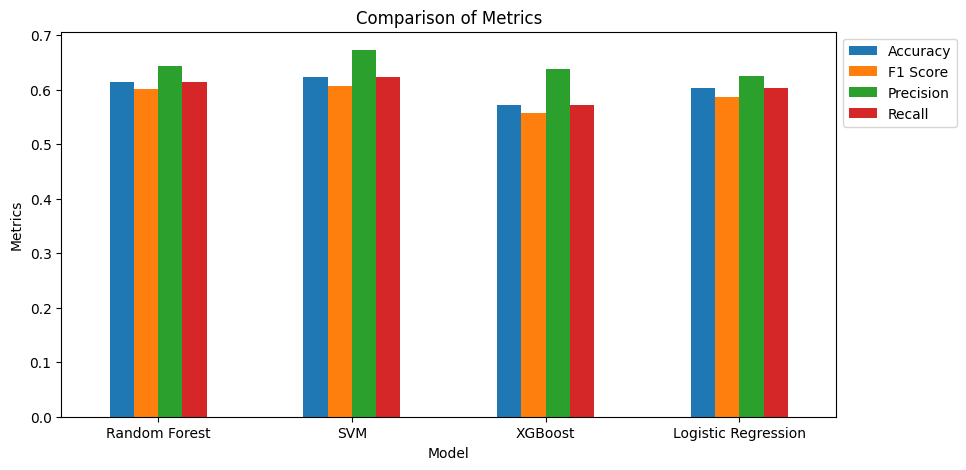

In [61]:
# Create a bar plot
result = formatted_results.plot(kind='bar', figsize=(10, 5))
result.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Comparison of Metrics')
plt.xticks(rotation=0)
plt.show()
